In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# 1.	Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need.

#### Bottle dataframe

In [2]:
bottle_df = pd.read_csv("bottle.csv")
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Rename the columns

In [3]:
bottle_df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [4]:
# .info() will show me how many non-null values are present in each column
print(bottle_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [5]:
#basic stats of df: mean, std, quartiles
bottle_df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [6]:
# explore the data
#datatype of the columns
bottle_df.dtypes

Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                   int64
                        ...   
TA1                    float64
TA2                    float64
pH2                    float64
pH1                    float64
DIC Quality Comment     object
Length: 74, dtype: object

#### Cleaning missing values
#### Impute missing data and drop NaNs that are above a certain percentage

In [7]:
# converting amount of missing values into a percentage

total= bottle_df.isnull().sum().sort_values(ascending=False)
percent= (bottle_df.isnull().sum()/bottle_df.isnull().count()).sort_values(ascending=False)*100

missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(30)

,Total,Percent
pH2,864853,99.998844
DIC Quality Comment,864808,99.993641
pH1,864779,99.990287
DIC2,864639,99.974100
TA2,864629,99.972944
DIC1,862864,99.768865
TA1,862779,99.759037
C14A2p,852121,98.526703
C14A1p,852103,98.524622
C14As2,850449,98.333378


In [8]:
#https://thispointer.com/pandas-drop-dataframe-columns-based-on-nan-percentage/
# dropping columns containing eithere 75% or more NaN values
perc = 70.0
min_count = int(((100-perc)/100)*bottle_df.shape[0]+1)
mod_bottle_df = bottle_df.dropna(axis=1, thresh=min_count)
mod_bottle_df

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,25.640,233.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,25.650,232.5,0.010,NaN,NaN,NaN,NaN,NaN,NaN,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,25.650,232.8,0.020,NaN,NaN,NaN,NaN,NaN,NaN,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,25.640,234.1,0.040,NaN,NaN,NaN,NaN,NaN,NaN,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,25.640,234.0,0.040,NaN,NaN,NaN,NaN,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,23.871,402.4,0.000,5.81,108.7,1.8,0.22,0.1,0.03,0
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,23.871,402.5,0.008,5.81,108.7,1.8,0.22,0.1,0.03,2
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,23.889,400.8,0.020,5.80,108.5,1.8,0.20,0.1,0.03,5
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,24.014,389.1,0.040,5.82,107.7,2.0,0.25,0.1,0.03,10


In [9]:
# have 44 columns left after removing those with 75% or more NaN
mod_bottle_df.shape

(864863, 44)

In [10]:
mod_bottle_df.isnull().sum()

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
S_prec          47354
P_qual         191108
Chlqua         225697
Phaqua         225693
PO4uM          451546
PO4q           413077
SiO3uM         510772
SiO3qu         353997
NO2uM          527287
NO2q           335389
NO3uM          527460
NO3q           334930
NH3q            56564
C14A1q          16258
C14A2q          16240
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP          10963
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA           52771
R_DYNHT         46657
R_O2           168662
R_O2Sat        198415
R_SIO3         510764
R_PO4          451538
R_NO3          527452
R_NO2          527279
R_PRES              0
dtype: int64

In [11]:
# fill the remaining NaN values using fillna with bfill method

bottles = mod_bottle_df.fillna(method='bfill')
bottles.head(30)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,5.9,25.649,92.8,...,25.64,233.0,0.00,5.9,92.8,52.0,0.6,24.8,0.0,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,5.9,25.656,92.8,...,25.65,232.5,0.01,5.9,92.8,52.0,0.6,24.8,0.0,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,5.9,25.654,92.8,...,25.65,232.8,0.02,5.9,92.8,52.0,0.6,24.8,0.0,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,5.9,25.643,92.8,...,25.64,234.1,0.04,5.9,92.8,52.0,0.6,24.8,0.0,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,5.9,25.643,92.8,...,25.64,234.0,0.04,5.9,92.8,52.0,0.6,24.8,0.0,20
5,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,5.9,25.651,92.8,...,25.65,233.5,0.07,5.9,92.8,52.0,0.6,24.8,0.0,30
6,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.45,33.440,5.9,25.658,92.8,...,25.65,233.0,0.09,5.9,92.8,52.0,0.6,24.8,0.0,39
7,1,8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,50,10.24,33.424,5.9,25.682,92.8,...,25.68,231.0,0.11,5.9,92.8,52.0,0.6,24.8,0.0,50
8,1,9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,58,10.06,33.420,5.9,25.710,92.8,...,25.71,228.5,0.13,5.9,92.8,52.0,0.6,24.8,0.0,58
9,1,10,054.0 056.0,19-4903CR-HY-060-0930-05400560-0075A-7,75,9.86,33.494,5.9,25.801,92.8,...,25.80,220.1,0.17,5.9,92.8,52.0,0.6,24.8,0.0,75


In [12]:
#checking to make sure there are no more missing values. P_qual, PO4q, SiO3qu, NO2q, NH3q, NO3q still have missing values
bottles.isnull().sum()

Cst_Cnt            0
Btl_Cnt            0
Sta_ID             0
Depth_ID           0
Depthm             0
T_degC             0
Salnty             0
O2ml_L             0
STheta             0
O2Sat              0
Oxy_µmol/Kg        0
RecInd             0
T_prec             0
S_prec             0
P_qual         33667
Chlqua             5
Phaqua             5
PO4uM              0
PO4q              86
SiO3uM             0
SiO3qu            86
NO2uM              0
NO2q               5
NO3uM              0
NO3q              21
NH3q               2
C14A1q             0
C14A2q             0
DarkAq             0
MeanAq             0
R_Depth            0
R_TEMP             0
R_POTEMP           0
R_SALINITY         0
R_SIGMA            0
R_SVA              0
R_DYNHT            0
R_O2               0
R_O2Sat            0
R_SIO3             0
R_PO4              0
R_NO3              0
R_NO2              0
R_PRES             0
dtype: int64

In [13]:
#filling in the remaining 8 columns with missing values
bottles['P_qual'] = bottles['P_qual'].fillna(bottles['P_qual'].median())
bottles['PO4q'] = bottles['PO4q'].fillna(bottles['PO4q'].median())
bottles['SiO3qu'] = bottles['SiO3qu'].fillna(bottles['SiO3qu'].median())
bottles['NO2q'] = bottles['NO2q'].fillna(bottles['NO2q'].median())
bottles['NH3q'] = bottles['NH3q'].fillna(bottles['NH3q'].median())
bottles['NO3q'] = bottles['NO3q'].fillna(bottles['NO3q'].median())

In [14]:
# no more null values
bottles.isnull().sum()

Cst_Cnt        0
Btl_Cnt        0
Sta_ID         0
Depth_ID       0
Depthm         0
T_degC         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
RecInd         0
T_prec         0
S_prec         0
P_qual         0
Chlqua         5
Phaqua         5
PO4uM          0
PO4q           0
SiO3uM         0
SiO3qu         0
NO2uM          0
NO2q           0
NO3uM          0
NO3q           0
NH3q           0
C14A1q         0
C14A2q         0
DarkAq         0
MeanAq         0
R_Depth        0
R_TEMP         0
R_POTEMP       0
R_SALINITY     0
R_SIGMA        0
R_SVA          0
R_DYNHT        0
R_O2           0
R_O2Sat        0
R_SIO3         0
R_PO4          0
R_NO3          0
R_NO2          0
R_PRES         0
dtype: int64

#### Transforming Categorical Data w/ Label Encoder

In [15]:
bottles.select_dtypes(['object']).columns

Index(['Sta_ID', 'Depth_ID'], dtype='object')

In [16]:
# https://www.projectpro.io/recipes/convert-string-categorical-variables-into-numerical-variables-using-label-encoder
#Label Encoder
from sklearn.preprocessing import LabelEncoder
def Encoder(df):
    #object, columnsToEncode will make a list of columns that have categorical/object values
          columnsToEncode = list(bottles.select_dtypes(include=['category','object']))
          # label encoder object with no parameters
          le = LabelEncoder()
          # a loop to interate over the columns from the columnsToEncode object
          for feature in columnsToEncode:
              try:
                  bottles[feature] = le.fit_transform(bottles[feature])
              except:
                  print('Error encoding '+feature)
          return bottles

df = Encoder(bottles)
df

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_PRES
0,1,1,312,0,0,10.500,33.4400,5.900,25.64900,92.80,...,25.640,233.0,0.000,5.90,92.8,52.0,0.60,24.8,0.00,0
1,1,2,312,1,8,10.460,33.4400,5.900,25.65600,92.80,...,25.650,232.5,0.010,5.90,92.8,52.0,0.60,24.8,0.00,8
2,1,3,312,2,10,10.460,33.4370,5.900,25.65400,92.80,...,25.650,232.8,0.020,5.90,92.8,52.0,0.60,24.8,0.00,10
3,1,4,312,3,19,10.450,33.4200,5.900,25.64300,92.80,...,25.640,234.1,0.040,5.90,92.8,52.0,0.60,24.8,0.00,19
4,1,5,312,4,20,10.450,33.4210,5.900,25.64300,92.80,...,25.640,234.0,0.040,5.90,92.8,52.0,0.60,24.8,0.00,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,1386,862861,0,18.744,33.4083,5.805,23.87055,108.74,...,23.871,402.4,0.000,5.81,108.7,1.8,0.22,0.1,0.03,0
864859,34404,864860,1386,862862,2,18.744,33.4083,5.805,23.87072,108.74,...,23.871,402.5,0.008,5.81,108.7,1.8,0.22,0.1,0.03,2
864860,34404,864861,1386,862863,5,18.692,33.4150,5.796,23.88911,108.46,...,23.889,400.8,0.020,5.80,108.5,1.8,0.20,0.1,0.03,5
864861,34404,864862,1386,862864,10,18.161,33.4062,5.816,24.01426,107.74,...,24.014,389.1,0.040,5.82,107.7,2.0,0.25,0.1,0.03,10


#### Cast dataframe

In [17]:
cast_df = pd.read_csv("cast.csv")
cast_df.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


#### Explore the cast dataframe

In [18]:
# look at the columns
print(cast_df.columns) 

Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'],
      dtype='object')


In [19]:
#datatype of the columns
cast_df.dtypes

Cst_Cnt         int64
Cruise_ID      object
Cruise          int64
Cruz_Sta        int64
DbSta_ID        int64
               ...   
Wet_T         float64
Wea           float64
Cloud_Typ     float64
Cloud_Amt     float64
Visibility    float64
Length: 61, dtype: object

In [20]:
#basic stats of df: mean, std, quartiles
cast_df.describe()

,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,34404.000000,34404.000000,3.440400e+04,3.440400e+04,34404.000000,19714.000000,34404.00000,34404.000000,34404.000000,34404.000000,...,11634.000000,32928.000000,32725.000000,19063.000000,19071.000000,18989.000000,26807.000000,9920.000000,11882.000000,9507.000000
mean,17202.500000,197406.030781,1.974061e+13,9.330342e+06,2.366556,-116.135017,1974.00218,5.835397,27017.612313,161.366236,...,6.440863,27.067602,11.135951,1016.243702,16.261989,14.414635,1.324729,5.636895,4.995624,6.803092
std,9931.723667,1974.562207,1.974557e+11,2.217993e+06,1.091894,117.282768,19.74668,3.326775,6900.075983,100.761217,...,2.295422,9.456406,6.823464,8.818816,2.728030,2.630224,1.162603,2.173354,3.106067,1.534078
min,1.000000,194903.000000,1.949030e+13,1.016800e+05,1.000000,-1920.150000,1949.00000,1.000000,17957.000000,2.000000,...,0.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,8601.750000,195701.000000,1.957011e+13,8.100430e+06,1.000000,-169.801500,1957.00000,3.000000,20832.750000,75.000000,...,5.000000,26.000000,6.000000,1013.700000,14.400000,12.600000,1.000000,6.000000,2.000000,6.000000
50%,17202.500000,196912.000000,1.969121e+13,9.000800e+06,2.000000,-83.570000,1969.00000,6.000000,25532.000000,157.000000,...,6.000000,31.000000,10.000000,1016.300000,16.100000,14.200000,1.000000,6.000000,6.000000,7.000000
75%,25803.250000,198809.000000,1.988091e+13,1.067032e+07,3.000000,-29.470000,1988.00000,9.000000,32400.000000,247.000000,...,8.000000,33.000000,15.000000,1019.100000,17.900000,16.000000,2.000000,7.000000,8.000000,8.000000
max,34404.000000,201611.000000,2.016111e+13,1.767030e+07,4.000000,-0.141000,2016.00000,12.000000,41116.000000,354.000000,...,50.000000,37.000000,71.000000,1112.600000,43.100000,58.000000,9.000000,9.000000,9.000000,9.000000


In [21]:
# .info() will show me how many non-null values are present in each column
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

#### Cleaning null values

In [22]:
cast_df.isnull().sum().sort_values(ascending=False).head(40)

Cruz_Leg      32940
ForelU        32327
Civil_T       32288
PST_LAN       32287
IntC14        32275
Inc_Str       32271
Inc_End       32271
TimeZone      29622
Secchi        29141
Visibility    24897
Cloud_Typ     24484
Order_Occ     24450
Wave_Prd      22770
Cloud_Amt     22522
Wave_Ht       22306
IntChl        22201
Wave_Dir      21846
Data_Or       16129
Wet_T         15415
Barometer     15341
Dry_T         15333
Distance      14690
Wea            7597
Bottom_D       2281
Ship_Name      1690
Wind_Spd       1679
Wind_Dir       1476
Time            324
Event_Num         3
DbSta_ID          0
Cast_ID           0
Sta_ID            0
Quarter           0
Cruz_Sta          0
Lat_Dec           0
Cruise            0
Sta_Code          0
Date              0
Year              0
Month             0
dtype: int64

In [23]:
total1= cast_df.isnull().sum().sort_values(ascending=False)
percent1= (cast_df.isnull().sum()/cast_df.isnull().count()).sort_values(ascending=False)*100

missing_data1= pd.concat([total1, percent1],axis=1, keys=["Total", "Percent"])
missing_data1

,Total,Percent
Cruz_Leg,32940,95.744681
ForelU,32327,93.962911
Civil_T,32288,93.849552
PST_LAN,32287,93.846646
IntC14,32275,93.811766
...,...,...
Lon_Dec,0,0.000000
Orig_Sta_ID,0,0.000000
Lat_Hem,0,0.000000
Cruz_Num,0,0.000000


In [24]:
# dropping columns containing eithere 70% or more NaN values
perc = 70.0
min_count = int(((100-perc)/100)*cast_df.shape[0]+1)
mod_cast_df = cast_df.dropna(axis=1, thresh=min_count)
mod_cast_df

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Amt
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,NaN,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,NaN,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,NaN,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,NaN,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,NaN,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,...,NaN,NaN,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,...,NaN,NaN,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,30.0,10.0,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,36.0,2.0,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,7.0


In [25]:
mod_cast_df.isnull().sum()

Cst_Cnt            0
Cruise_ID          0
Cruise             0
Cruz_Sta           0
DbSta_ID           0
Cast_ID            0
Sta_ID             0
Quarter            0
Sta_Code           0
Distance       14690
Date               0
Year               0
Month              0
Julian_Date        0
Julian_Day         0
Time             324
Lat_Dec            0
Lat_Deg            0
Lat_Min            0
Lat_Hem            0
Lon_Dec            0
Lon_Deg            0
Lon_Min            0
Lon_Hem            0
Rpt_Line           0
St_Line            0
Ac_Line            0
Rpt_Sta            0
St_Station         0
Ac_Sta             0
Bottom_D        2281
Ship_Name       1690
Ship_Code          0
Data_Type          0
Event_Num          3
Orig_Sta_ID        0
Data_Or        16129
Cruz_Num           0
IntChl         22201
Wave_Dir       21846
Wave_Ht        22306
Wave_Prd       22770
Wind_Dir        1476
Wind_Spd        1679
Barometer      15341
Dry_T          15333
Wet_T          15415
Wea          

In [26]:
# fill remaining columns
cast = mod_cast_df.fillna(method = 'bfill')
cast.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Amt
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,-190.33,...,24.0,3.0,6.0,23.0,18.0,1015.2,15.6,14.0,2.0,1.0
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,-190.33,...,24.0,3.0,6.0,16.0,5.0,1015.2,15.6,14.0,4.0,1.0
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,-190.33,...,24.0,3.0,6.0,23.0,5.0,1015.2,15.6,14.0,6.0,1.0
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,-190.33,...,24.0,3.0,6.0,18.0,8.0,1015.2,15.6,14.0,2.0,1.0
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,-190.33,...,24.0,3.0,6.0,27.0,13.0,1015.2,15.6,14.0,7.0,1.0


#### Transforming catergorical columns

In [27]:
cast.select_dtypes(['object']).columns

Index(['Cruise_ID', 'Cast_ID', 'Sta_ID', 'Sta_Code', 'Date', 'Time', 'Lat_Hem',
       'Lon_Hem', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Orig_Sta_ID',
       'Data_Or', 'Cruz_Num'],
      dtype='object')

In [60]:
#converting column types
cast[['Data_Or', 'Cruz_Num']].head(20)

,Data_Or,Cruz_Num
0,3101.0,4903
1,3101.0,4903
2,3101.0,4903
3,3101.0,4903
4,3101.0,4903
5,3101.0,4903
6,3101.0,4903
7,3101.0,4903
8,3101.0,4903
9,3101.0,4903


In [51]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
def Cast_Encoder(df):
    #object, columnsToEncode will make a list of columns that have categorical/object values
          columnsToEncode = list(cast.select_dtypes(include=['category','object']))
          # label encoder object with no parameters
          le = LabelEncoder()
          # a loop to interate over the columns from the columnsToEncode object
          for feature in columnsToEncode:
              try:
                  cast[feature] = le.fit_transform(cast[feature])
              except:
                  print('Error encoding '+feature)
          return cast

df = Cast_Encoder(cast)
df

Error encoding Data_Or
Error encoding Cruz_Num


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Dir,Wave_Ht,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Amt
0,1,0,194903,19490305400560,5400560,0,312,1,3,-190.330,...,24.0,3.0,6.0,23.0,18.0,1015.2,15.6,14.0,2.0,1.0
1,2,0,194903,19490305200750,5200750,1,272,1,3,-190.330,...,24.0,3.0,6.0,16.0,5.0,1015.2,15.6,14.0,4.0,1.0
2,3,0,194903,19490305100850,5100850,2,262,1,3,-190.330,...,24.0,3.0,6.0,23.0,5.0,1015.2,15.6,14.0,6.0,1.0
3,4,0,194903,19490305000950,5000950,3,242,1,3,-190.330,...,24.0,3.0,6.0,18.0,8.0,1015.2,15.6,14.0,2.0,1.0
4,5,0,194903,19490305001040,5001040,4,245,1,3,-190.330,...,24.0,3.0,6.0,27.0,13.0,1015.2,15.6,14.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,644,201611,20161109330900,9330900,34339,1365,4,6,-254.345,...,30.0,10.0,15.0,34.0,16.0,1017.5,17.1,16.4,1.0,6.0
34400,34401,644,201611,20161109331000,9331000,34340,1370,4,6,-294.297,...,30.0,10.0,15.0,36.0,14.0,1019.6,18.0,16.2,1.0,6.0
34401,34402,644,201611,20161109331100,9331100,34341,1372,4,6,-334.157,...,30.0,10.0,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0
34402,34403,644,201611,20161109331200,9331200,34342,1374,4,6,-373.979,...,36.0,2.0,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,7.0


In [54]:

print(cast['Cruz_Num'])

0        4903
1        4903
2        4903
3        4903
4        4903
         ... 
34399    1611
34400    1611
34401    1611
34402    1611
34403    1611
Name: Cruz_Num, Length: 34404, dtype: object


# 2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 

The line of 1.00s going from the top left to the bottom right is the main diagonal, showing that each variable is perfectly correlated with itself. The matrix is also symmetrical, so half of the correlation coefficients shown are redundant and unnecessary. R_TEMP(reported temperature) has a perfect correlation with water temperature; R_SVA (Reported Specific Volume Anomaly), R_POTEMP(Reported Potential Temperature) are independent variables that are highly correlated with water temperature. This can lead to multicollinearity, which means it becomes difficult to change values of a given predictor variable without changing the values of the othr predictor variables. 

In [28]:
corr_matrix = bottles.corr()
corr_matrix

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_PRES
Cst_Cnt,1.000000,0.999345,-0.235140,0.999338,-0.162222,0.088811,-0.140878,0.083247,-0.034916,0.017976,...,-0.033204,0.037671,-0.067701,0.083266,0.014613,-0.410061,-0.180165,-0.203062,0.077924,-0.161961
Btl_Cnt,0.999345,1.000000,-0.231387,0.999994,-0.161617,0.089372,-0.138305,0.081035,-0.034569,0.015916,...,-0.032796,0.037287,-0.068088,0.081055,0.012577,-0.414392,-0.183111,-0.212648,0.087460,-0.161348
Sta_ID,-0.235140,-0.231387,1.000000,-0.231521,0.010888,0.224985,0.339760,-0.080504,-0.074978,-0.018481,...,-0.077256,0.090340,0.027710,-0.080509,-0.018269,0.064716,0.112898,0.009444,-0.032728,0.010509
Depth_ID,0.999338,0.999994,-0.231521,1.000000,-0.161590,0.089371,-0.138333,0.080703,-0.034586,0.015570,...,-0.032811,0.037298,-0.068118,0.080723,0.012234,-0.414191,-0.182949,-0.212463,0.087510,-0.161321
Depthm,-0.162222,-0.161617,0.010888,-0.161590,1.000000,-0.678579,0.506680,-0.462752,0.521312,-0.424593,...,0.534095,-0.583880,0.798495,-0.462754,-0.419725,0.348205,0.241716,0.223482,-0.070553,0.999994
T_degC,0.088811,0.089372,0.224985,0.089371,-0.678579,1.000000,-0.448441,0.611384,-0.776184,0.620948,...,-0.801047,0.887702,-0.726342,0.611386,0.618312,-0.365639,-0.350796,-0.373489,0.061890,-0.677238
Salnty,-0.140878,-0.138305,0.339760,-0.138333,0.506680,-0.448441,1.000000,-0.595298,0.598426,-0.592648,...,0.617388,-0.679882,0.641813,-0.595301,-0.590380,0.330563,0.387982,0.288731,-0.026040,0.505495
O2ml_L,0.083247,0.081035,-0.080504,0.080703,-0.462752,0.611384,-0.595298,1.000000,-0.555056,0.948121,...,-0.573170,0.632237,-0.560481,0.999999,0.945693,-0.507232,-0.570136,-0.516212,0.036792,-0.461431
STheta,-0.034916,-0.034569,-0.074978,-0.034586,0.521312,-0.776184,0.598426,-0.555056,1.000000,-0.626483,...,0.961319,-0.870380,0.697463,-0.555060,-0.623569,0.298635,0.339428,0.306310,-0.025765,0.520029
O2Sat,0.017976,0.015916,-0.018481,0.015570,-0.424593,0.620948,-0.592648,0.948121,-0.626483,1.000000,...,-0.646947,0.714558,-0.610771,0.948119,0.995922,-0.472856,-0.550095,-0.496176,0.009416,-0.423309


In [29]:
#drop columns that are highly correlated
#correlated features means that they bring the same information, so it is logical to remove one of them


# Create correlation matrix
corr_matrix = bottles.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
bottles.drop(to_drop, axis=1, inplace=True)
bottles.columns


Index(['Cst_Cnt', 'Sta_ID', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'RecInd', 'T_prec', 'S_prec', 'P_qual', 'Chlqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3q',
       'C14A1q', 'DarkAq', 'R_POTEMP', 'R_DYNHT'],
      dtype='object')

In [30]:
corr_mat = bottles.corr()
corr_mat

,Cst_Cnt,Sta_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,RecInd,T_prec,...,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3q,C14A1q,DarkAq,R_POTEMP,R_DYNHT
Cst_Cnt,1.000000,-0.235140,-0.162222,0.088811,-0.140878,0.083247,-0.034916,0.017976,-0.100142,0.038663,...,-0.122559,0.077771,-0.162828,-0.203076,-0.179092,-0.213226,-0.002955,-0.002795,0.008053,-0.067701
Sta_ID,-0.235140,1.000000,0.010888,0.224985,0.339760,-0.080504,-0.074978,-0.018481,0.007901,-0.052054,...,0.048163,-0.032683,0.048028,0.009448,0.054407,0.049986,0.000525,0.000528,0.245196,0.027710
Depthm,-0.162222,0.010888,1.000000,-0.678579,0.506680,-0.462752,0.521312,-0.424593,0.082316,0.009606,...,0.019239,-0.070539,0.023615,0.223477,0.018941,0.024005,0.001944,0.001804,-0.595435,0.798495
T_degC,0.088811,0.224985,-0.678579,1.000000,-0.448441,0.611384,-0.776184,0.620948,-0.070930,-0.028885,...,-0.014243,0.061873,-0.017639,-0.373486,-0.019649,-0.015080,-0.004030,-0.003886,0.926571,-0.726342
Salnty,-0.140878,0.339760,0.506680,-0.448441,1.000000,-0.595298,0.598426,-0.592648,0.055141,-0.026964,...,0.038200,-0.025998,0.042684,0.288730,0.047241,0.041331,0.003714,0.003536,-0.482282,0.641813
O2ml_L,0.083247,-0.080504,-0.462752,0.611384,-0.595298,1.000000,-0.555056,0.948121,-0.044461,0.089334,...,0.003913,0.036790,0.008654,-0.516207,0.009328,0.019156,-0.002894,-0.002710,0.563638,-0.560481
STheta,-0.034916,-0.074978,0.521312,-0.776184,0.598426,-0.555056,1.000000,-0.626483,0.048645,0.011822,...,0.015723,-0.025750,0.019039,0.306307,0.021904,0.016401,0.003900,0.003742,-0.838476,0.697463
O2Sat,0.017976,-0.018481,-0.424593,0.620948,-0.592648,0.948121,-0.626483,1.000000,-0.031761,0.088502,...,0.010866,0.009418,0.015337,-0.496171,0.015818,0.025161,-0.003107,-0.002907,0.658102,-0.610771
RecInd,-0.100142,0.007901,0.082316,-0.070930,0.055141,-0.044461,0.048645,-0.031761,1.000000,0.019759,...,0.012490,-0.041848,0.019594,0.027286,0.020983,0.026585,0.002577,0.002577,-0.052392,0.071767
T_prec,0.038663,-0.052054,0.009606,-0.028885,-0.026964,0.089334,0.011822,0.088502,0.019759,1.000000,...,0.016532,-0.032659,0.016215,-0.066522,0.017837,0.016541,0.000363,0.000363,-0.027920,0.001547


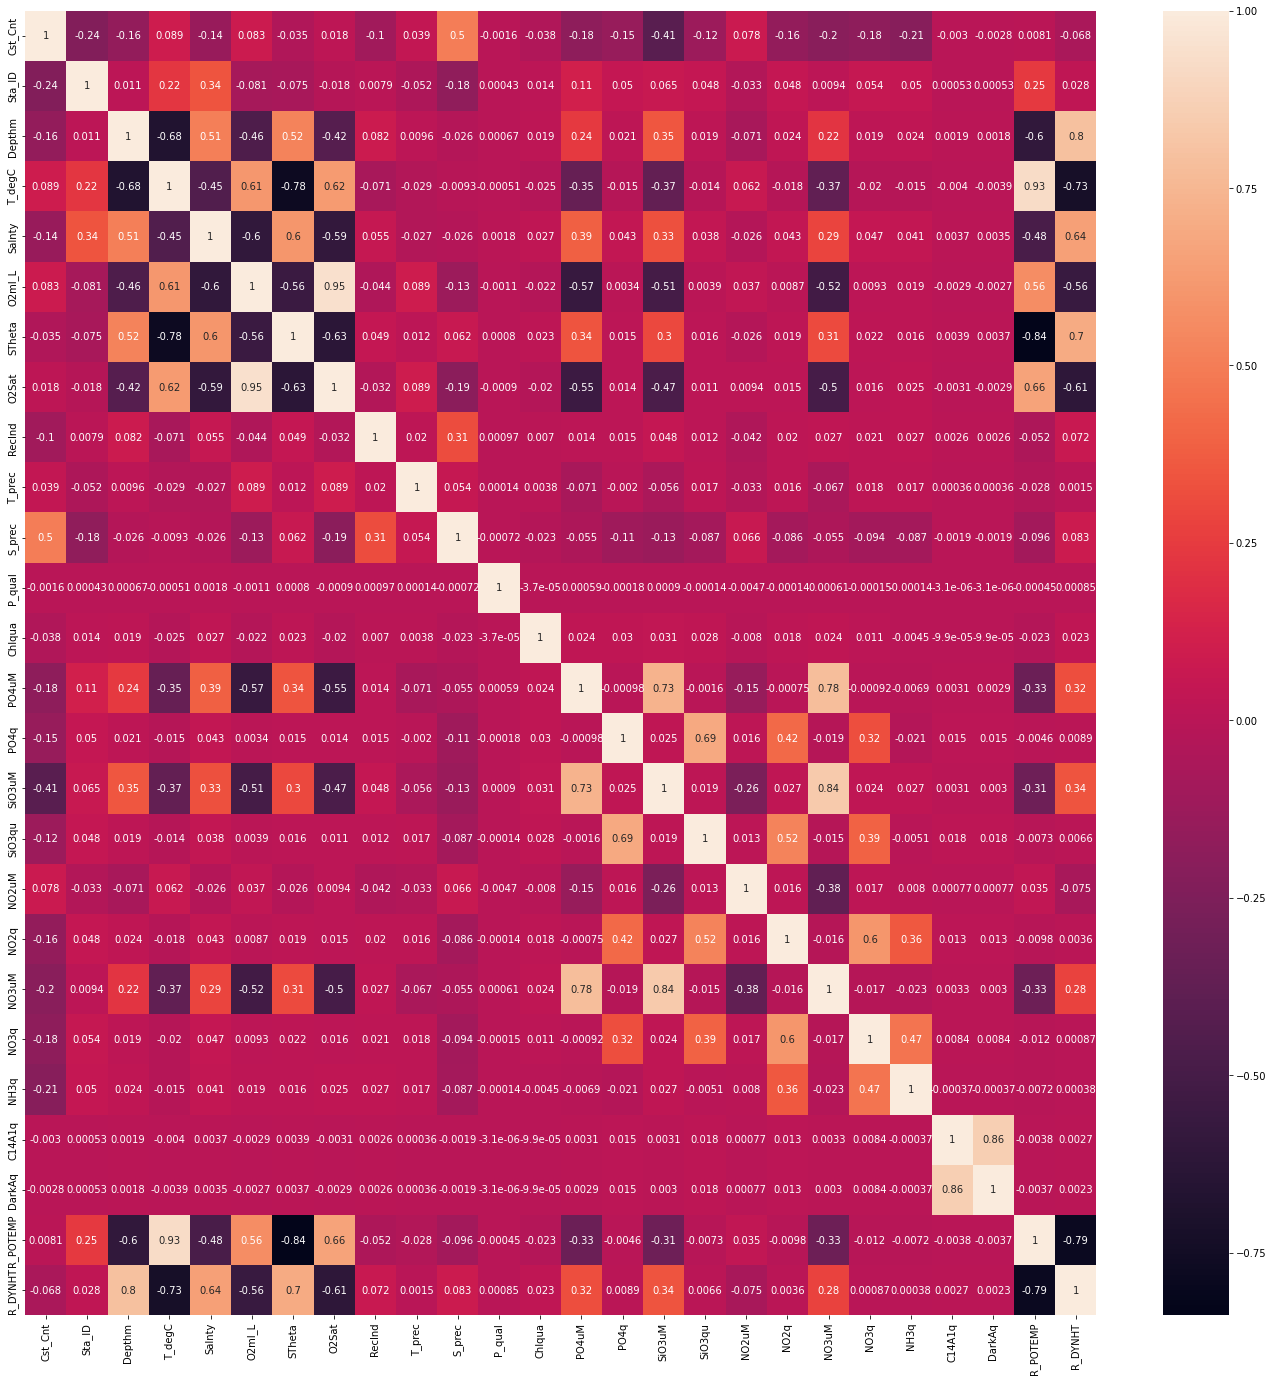

In [31]:
# visual for corr. matrix after hoghly correlated columns were dropped
import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(24,24))
sn.heatmap(corr_mat, annot=True)
plt.show()

# 3. Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

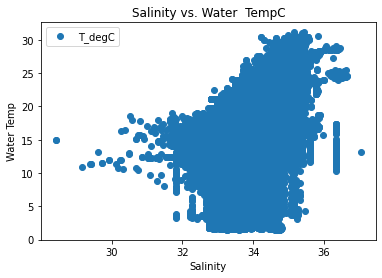

In [32]:
# plotting the data points on 2-d graph to see if we can manually find any relationship between water temp and salinity

bottles.plot(x = 'Salnty', y = 'T_degC', style = 'o')
plt.title('Salinity vs. Water  TempC')
plt.xlabel('Salinity')
plt.ylabel('Water Temp')
plt.show()

In [33]:
#1. train-test split

X = np.array(bottles['Salnty']).reshape(-1,1)
y = np.array(bottles['T_degC']).reshape(-1,1)
# 70% of the data is training set, 30% is testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [34]:
#2. create the model

from sklearn.linear_model import LinearRegression

#create linear regression object
reg_df = LinearRegression()
#train the model using training sets
reg_df.fit(X_train, y_train)

LinearRegression()

In [35]:
# linear regression model finds the best value for the intercept and slope, which results in a line that fits the data 
#the best. Find the intercept and intercept

print(reg_df.intercept_)  # explains y-intercept well: https://statisticsbyjim.com/regression/interpret-constant-y-intercept-regression/
#find the slope
print(reg_df.coef_)

[147.74975806]
[[-4.04788834]]


In [36]:
#3. predict new values
y_pred = reg_df.predict(X_test)
print('Predicted output values: ', y_pred)

Predicted output values:  [[16.46054759]
 [11.38044772]
 [ 9.67628673]
 ...
 [ 8.85051751]
 [13.63916942]
 [12.95507629]]


In [37]:
#comparing the actual output values for X_test with the predicted values
# The output shows that the model is not very precise in predicting the water temp using salinity

data = {'Acutal': y_test, 'Predicted': y_pred.round(2)}
data = pd.DataFrame([data])
for index, row in data.iterrows():
    print(row)

Acutal       [[12.94], [9.1], [19.35], [16.68], [4.95], [7....
Predicted    [[16.46], [11.38], [9.68], [12.59], [9.14], [9...
Name: 0, dtype: object


# 4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics.

The R2 value shows that the strength of the relationship between water temperature and salinity is weak. This statistic indicates that 20% of the variance in the water temperature is explained by the salinity (the independent variable). The higher the R2 value, the better the model fits the data. Possibly running a multiple linear regression would be better since we can add more independent variables that could explain the variance in water temperature
Mean squared error indicates that the linear regression model does not perform well for this dataset. As model error increases, its value increases and a lower MSE would mean a better model.

In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# r squared values (aka coefficient of determination: 1 is perfect prediction)
print('R2 value: {}'.format(r2_score(y_test, y_pred)))

#Mean Squared Error 
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

# Root mean squared error
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test

R2 value: -0.20050700450863057
MSE: 21.75249497422677


4.663957008188087

# 5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

For this data, the plot shows that linear regression is not a good fit.

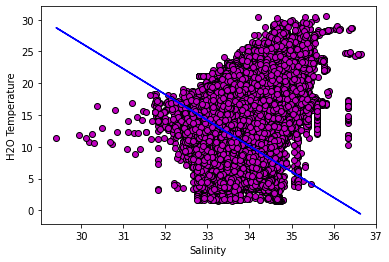

In [39]:
# regression plot
plt.scatter(X_test, y_test, color = 'm', edgecolor = 'black')
plt.plot(X_test, y_pred, color='b')
plt.xlabel('Salinity')
plt.ylabel('H2O Temperature')
plt.show()

# 6.	Do some research on polynomial regression. Describe what it is and how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ 

Polynomial regression is a form of linear regression and is used on non-linear data. It helps identify the curvilinear relationship between independent and dependent variables. If data pints will not fit  a linear regression(straight line thorugh all data points), use polynomial regression.

It uses thee relationship between variables X and Y to find the best way to draw a line through the data points. The relationship between the varaibles is measured with a value called r-squared. Value of 0 meand no relationship while a value of 1 means 100% related. If there is a good relationship, polynomial regression can be used to make future predictions. 

# 7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

In [66]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures 

#X = np.array(bottles['Salnty']).reshape(-1,1)
#y = np.array(bottles['T_degC']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# perform a polynomial features transform of the dataset
# the degree is a hyperparameter. if it's too high, it'll overfit the data, and too low will underfit
poly_regs= PolynomialFeatures(degree= 4)  
x_poly= poly_regs.fit_transform(X_train) 
# Linear Regression assgined to variable lin_reg which is fitted with x_poly and y_train for building the model
lin_reg = LinearRegression()  
lin_reg.fit(x_poly, y_train)

LinearRegression()

In [67]:
#predicting on test dataset
y_test_pred = lin_reg.predict(poly_regs.fit_transform(X_test))

In [68]:
# R2
r2_test = r2_score(y_test, y_test_pred)
print('R2 score is {}'.format(r2_test))

R2 score is 0.2949677186064886


In [69]:
#MSE
mse = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error is {}'.format(mse))

Mean Squared Error is 12.774778572789026


In [70]:
#root mean squared error
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_test

3.5741822243401393

In [71]:
from scipy.stats import pearsonr

# checking the correlation between the variables
corr, _ = pearsonr(bottles['T_degC'], bottles['Salnty'])
corr

-0.4484407016312255

#### The results from both the the models are very similar.  The results of the polynomial regression improved as the degree increased. However, the R2 results are not high even though it is higher than linear regression.
#### The correlation between water temperature and salinity are around  - 0.45.

# 8.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

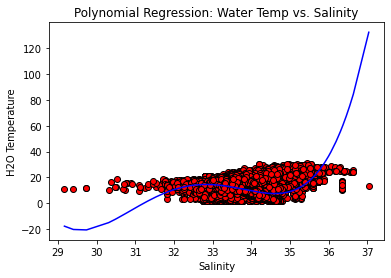

In [72]:
# polynomial regression plot
orders = np.argsort(X_test.ravel())

plt.scatter(X_test, y_test, color = 'r', edgecolor = 'black')
plt.plot(X_test[orders], y_test_pred[orders], color='b')
plt.xlabel('Salinity')
plt.ylabel('H2O Temperature')
plt.title('Polynomial Regression: Water Temp vs. Salinity')
plt.show()

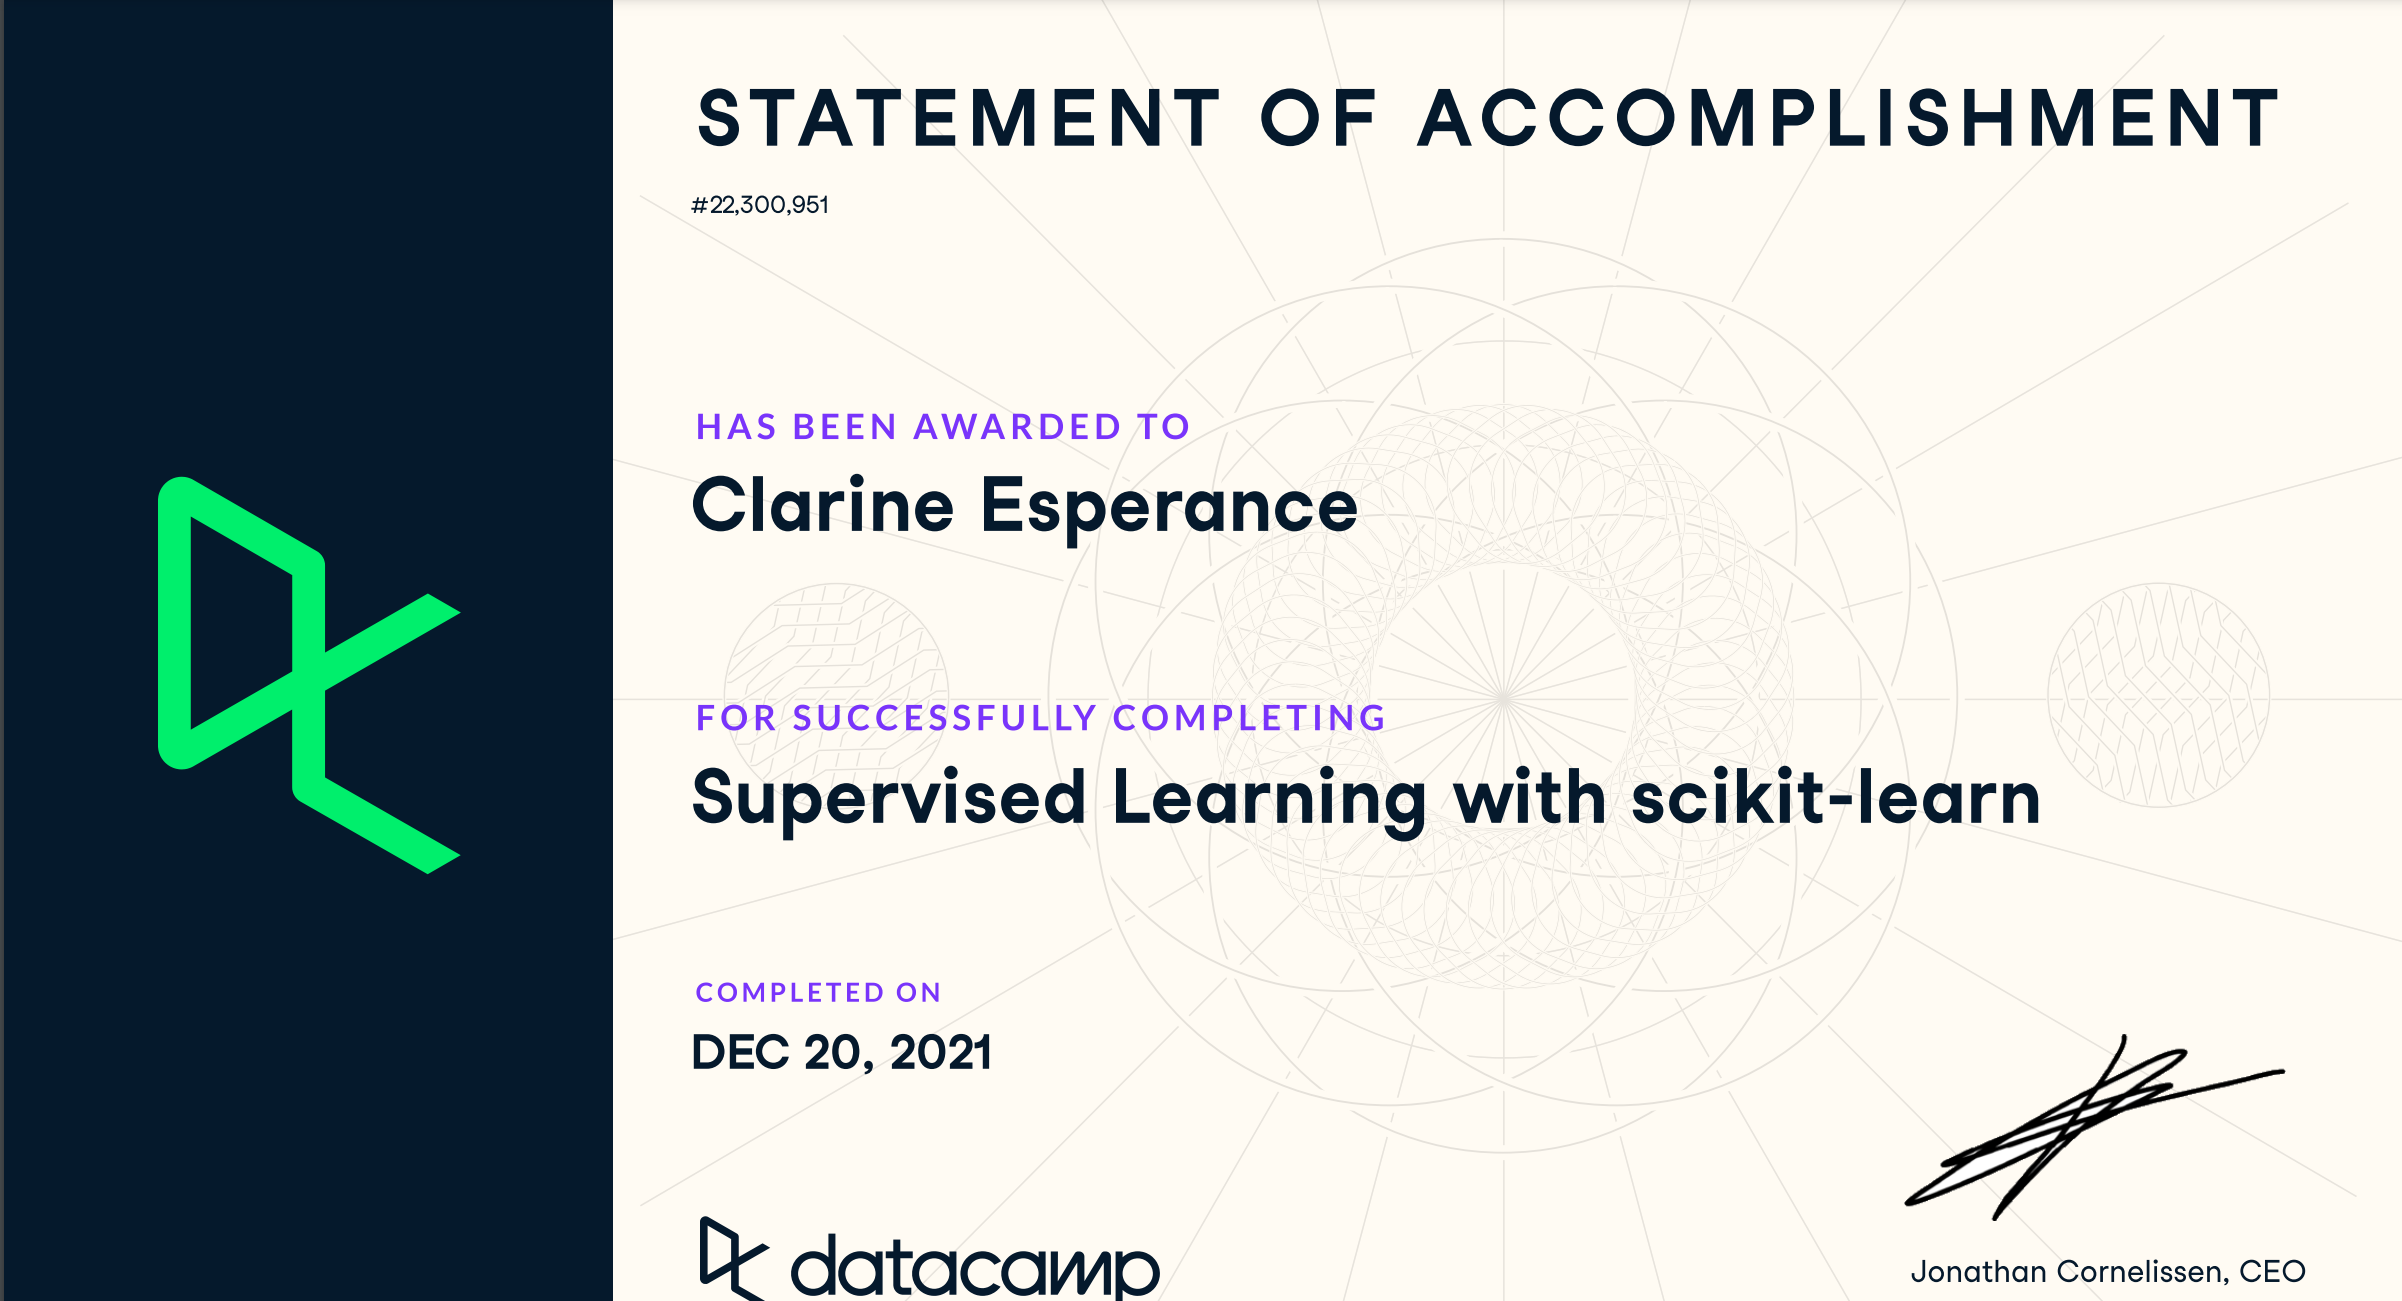

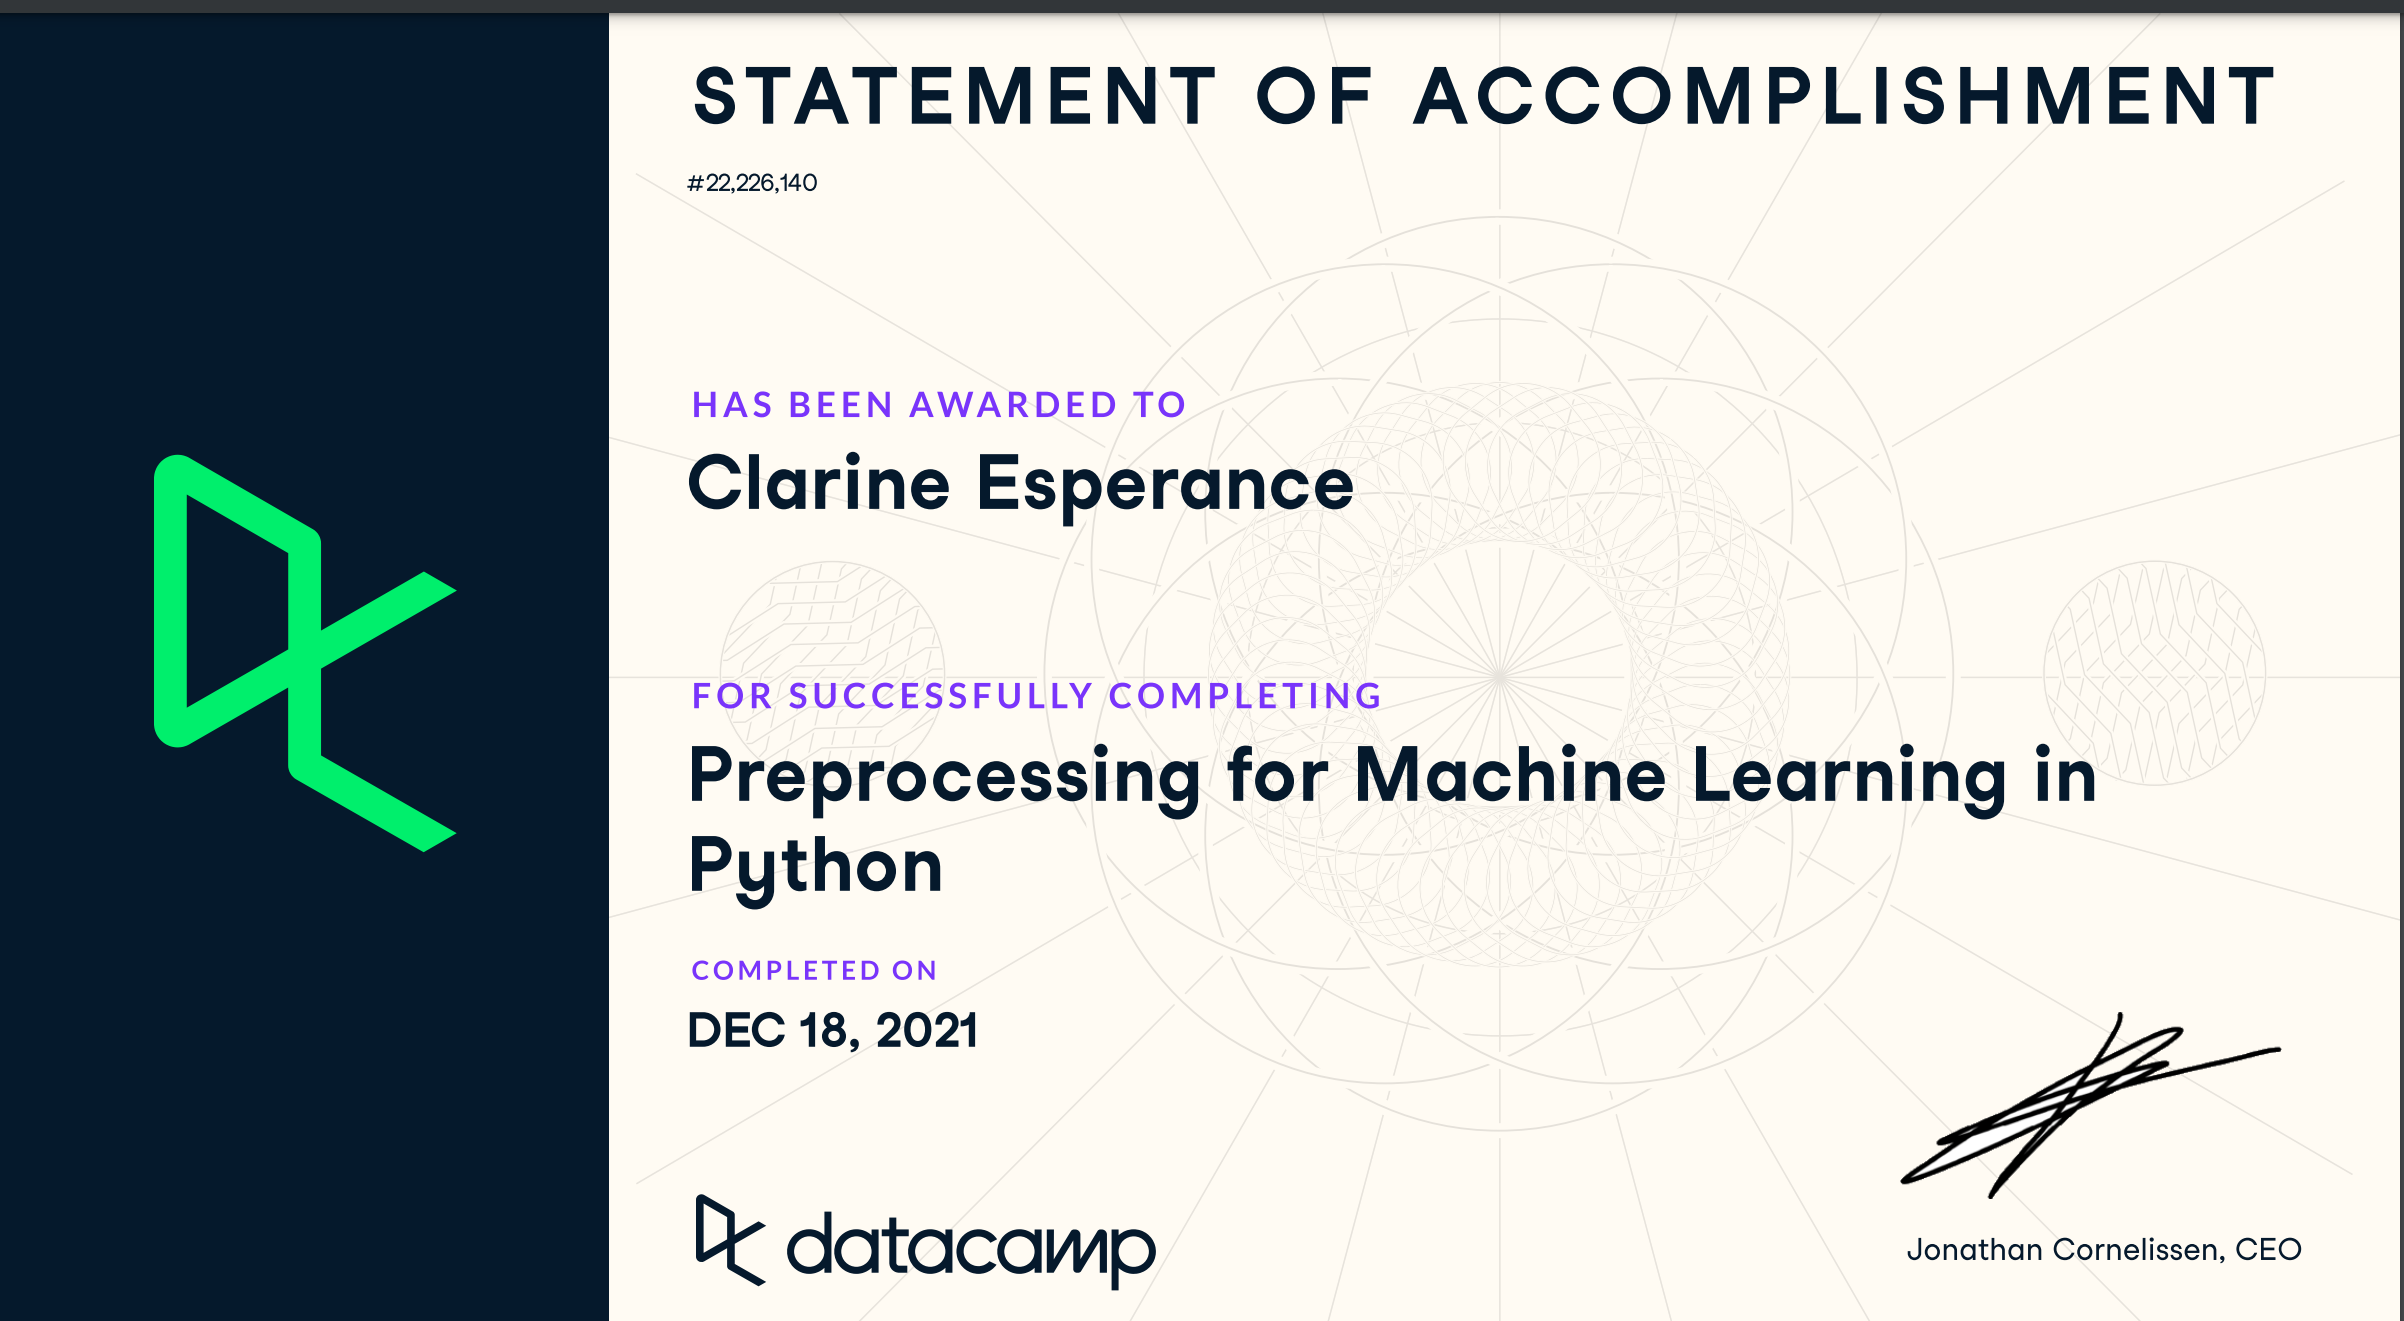